In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import altair as alt
import pandas as pd
import scipy.stats as ss

%matplotlib inline

In [2]:
import vega_datasets

movies = vega_datasets.data.movies()
movies.head()

,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross
0,None,None,Gramercy,6.1,1071.0,R,None,8000000.0,12-Jun-98,NaN,NaN,None,The Land Girls,NaN,146083.0,146083.0
1,None,None,Strand,6.9,207.0,R,Drama,300000.0,7-Aug-98,NaN,NaN,None,"First Love, Last Rites",NaN,10876.0,10876.0
2,None,None,Lionsgate,6.8,865.0,None,Comedy,250000.0,28-Aug-98,NaN,NaN,None,I Married a Strange Person,NaN,203134.0,203134.0
3,None,None,Fine Line,NaN,NaN,None,Comedy,300000.0,11-Sep-98,13.0,NaN,None,Let's Talk About Sex,NaN,373615.0,373615.0
4,Contemporary Fiction,None,Trimark,3.4,165.0,R,Drama,1000000.0,9-Oct-98,62.0,NaN,Original Screenplay,Slam,NaN,1009819.0,1087521.0


In [3]:
movies = movies.dropna(subset=['IMDB_Rating', 'Rotten_Tomatoes_Rating'])

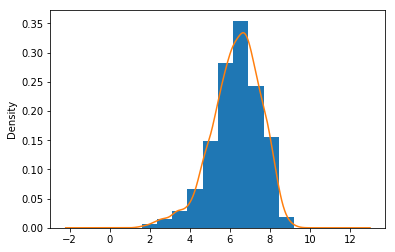

In [4]:
movies['IMDB_Rating'].hist(bins=10, density = True)
movies['IMDB_Rating'].plot(kind='kde')

/Users/SJ/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


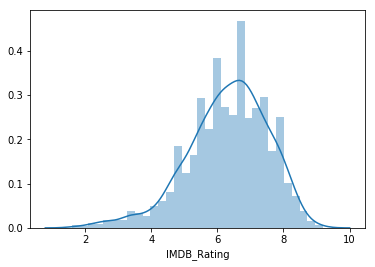

In [5]:
sns.distplot(movies['IMDB_Rating'])

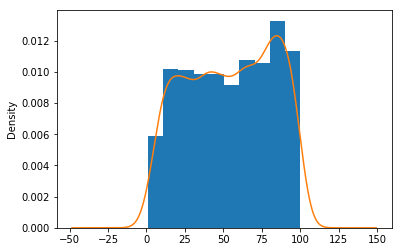

In [6]:
movies['Rotten_Tomatoes_Rating'].hist(bins=10, density = True)
movies['Rotten_Tomatoes_Rating'].plot(kind='kde')

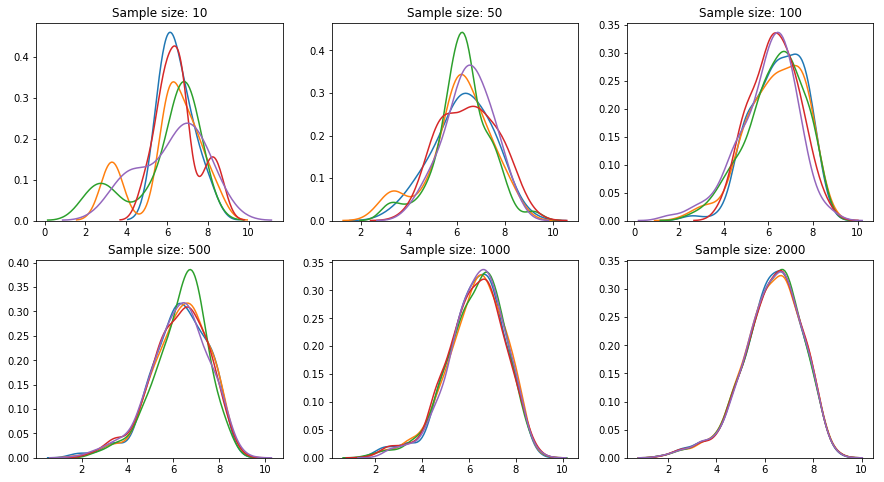

In [11]:
f = plt.figure(figsize=(15,8))
plt.xlim(0, 10)

sample_sizes = [10, 50, 100, 500, 1000, 2000]
for i, N in enumerate(sample_sizes, 1):
    plt.subplot(2,3,i)
    plt.title("Sample size: {}".format(N))
    for j in range(5):
        s = movies['IMDB_Rating'].sample(N)
        sns.kdeplot(s, kernel='gau', legend=False)

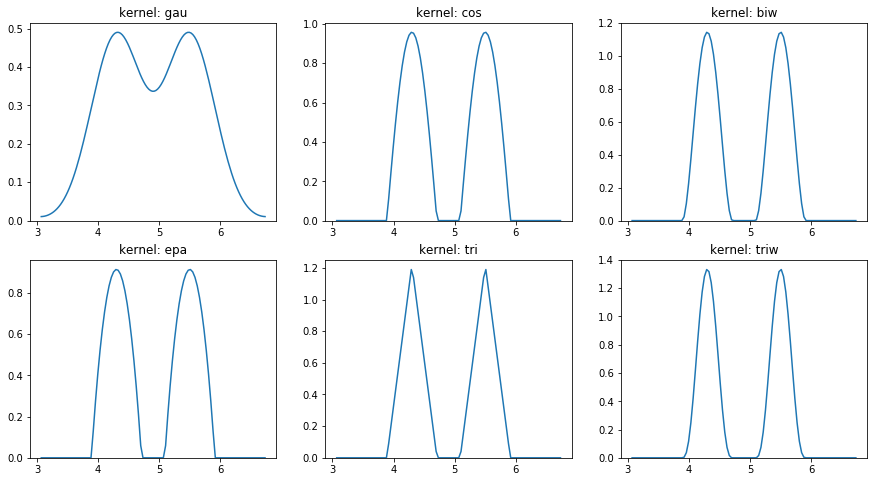

In [34]:
f = plt.figure(figsize=(15,8))
plt.xlim(0, 10)

sample_sizes = [2]
plt.subplot(2,3,1)
plt.title("kernel: gau")
sns.kdeplot(s, kernel = 'gau', legend=False)
sample_sizes = [2]
plt.subplot(2,3,2)
plt.title("kernel: cos")
sns.kdeplot(s, kernel = 'cos', legend=False)
sample_sizes = [2]
plt.subplot(2,3,3)
plt.title("kernel: biw")
sns.kdeplot(s, kernel = 'biw', legend=False)
sample_sizes = [2]
plt.subplot(2,3,4)
plt.title("kernel: epa")
sns.kdeplot(s, kernel = 'epa', legend=False)
sample_sizes = [2]
plt.subplot(2,3,5)
plt.title("kernel: tri")
sns.kdeplot(s, kernel = 'tri', legend=False)
sample_sizes = [2]
plt.subplot(2,3,6)
plt.title("kernel: triw")
sns.kdeplot(s, kernel = 'triw', legend=False)

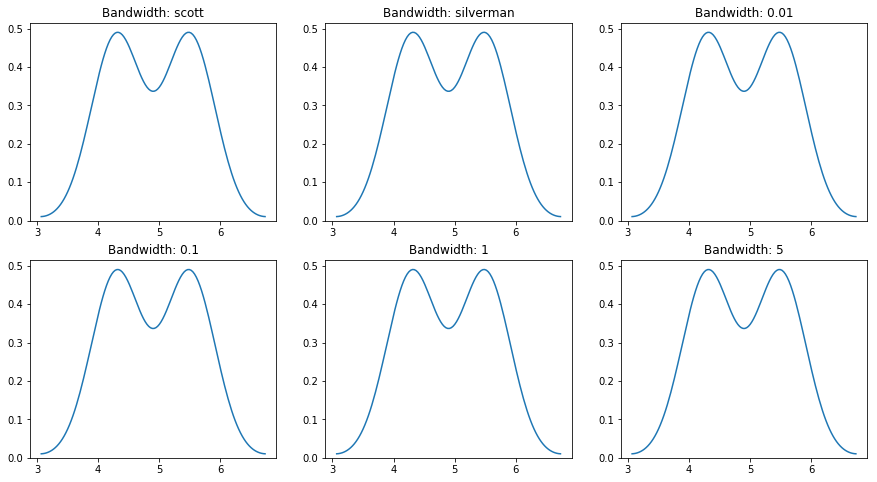

In [106]:
f = plt.figure(figsize=(15,8))
bw = ['scott', 'silverman', 0.01, 0.1, 1, 5]
sample_size = 10
kernel = 'gau'
plt.xlim(0, 20)
for i, N in enumerate(bw,1):
    plt.subplot(2,3,i)
    plt.title("Bandwidth: {}".format(N))
    sns.kdeplot(s, kernel='gau', legend=False)
    
    
## Q
## The result of the visualization changes according to the
## size of the bandwidth. Although I couldn't show it here,
## the graphs from the assignment example seems to
## represent that wider the bandwidth, the visualization seems to
## be more loose or curvier than narrow bandwidth.

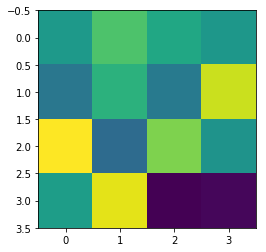

In [40]:
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
np.random.seed(0)
grid = np.random.rand(4, 4)

plt.imshow(grid, interpolation=None, cmap='viridis')

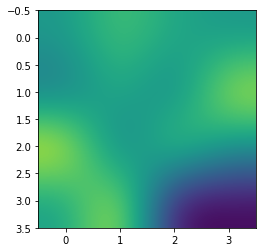

In [41]:
plt.imshow(grid, interpolation='bicubic', cmap='viridis')

In [42]:
co2 = vega_datasets.data.co2_concentration()
co2.head()

,Date,CO2
0,1958-03-01,315.70
1,1958-04-01,317.46
2,1958-05-01,317.51
3,1958-07-01,315.86
4,1958-08-01,314.93


In [43]:
co2.Date.dtype

dtype('O')

In [44]:
pd.to_datetime(co2.Date).head()

0   1958-03-01
1   1958-04-01
2   1958-05-01
3   1958-07-01
4   1958-08-01
Name: Date, dtype: datetime64[ns]

In [45]:
co2.Date = pd.to_datetime(co2.Date)

In [46]:
co2.set_index('Date', inplace=True)
co2.head()

,CO2
Date,
1958-03-01,315.70
1958-04-01,317.46
1958-05-01,317.51
1958-07-01,315.86
1958-08-01,314.93


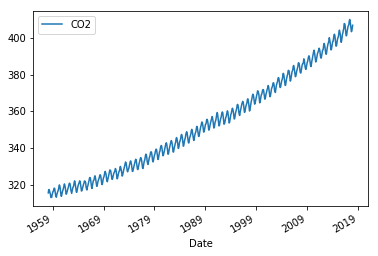

In [47]:
co2.plot()

In [48]:
recent_co2 = co2.tail(8)

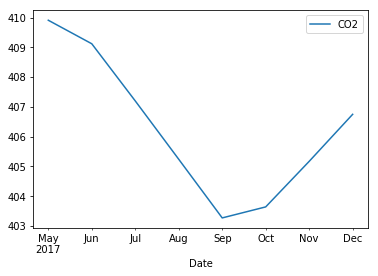

In [49]:
recent_co2.plot()

In [50]:
upsampled = recent_co2.resample('D').mean()
upsampled

,CO2
Date,
2017-05-01,409.91
2017-05-02,NaN
2017-05-03,NaN
2017-05-04,NaN
2017-05-05,NaN
2017-05-06,NaN
2017-05-07,NaN
2017-05-08,NaN
2017-05-09,NaN


In [51]:
upsampled = recent_co2.resample('D').mean()
upsampled.head(35)

,CO2
Date,
2017-05-01,409.91
2017-05-02,NaN
2017-05-03,NaN
2017-05-04,NaN
2017-05-05,NaN
2017-05-06,NaN
2017-05-07,NaN
2017-05-08,NaN
2017-05-09,NaN


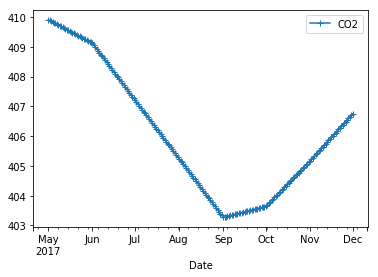

In [96]:
recent_co2.resample('D').interpolate(method='linear').plot(style='+-')

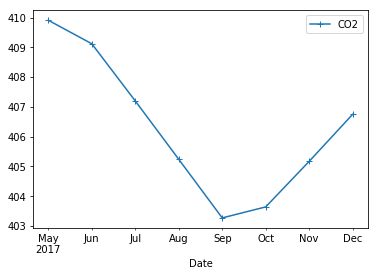

In [54]:
recent_co2.plot(style='+-')

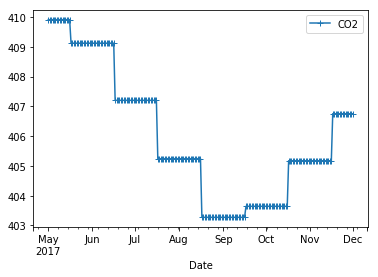

In [102]:
recent_co2.resample('D').interpolate(method='nearest').plot(style='+-')

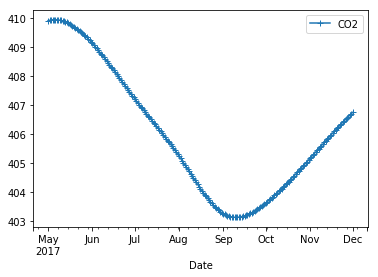

In [109]:
recent_co2.resample('D').interpolate(method='polynomial', order=3).plot(style='+-')

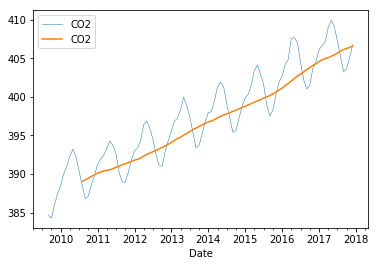

In [103]:
ax = co2[-100:].plot(lw=0.5)
co2[-100:].rolling(12).mean().plot(ax=ax)

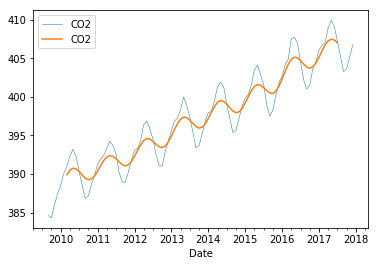

In [116]:
ax = co2[-100:].plot(lw=0.5)
co2[-100:].rolling(12, center=True, win_type = 'triang').mean().plot(ax=ax)

In [117]:
df = sns.load_dataset("anscombe")
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


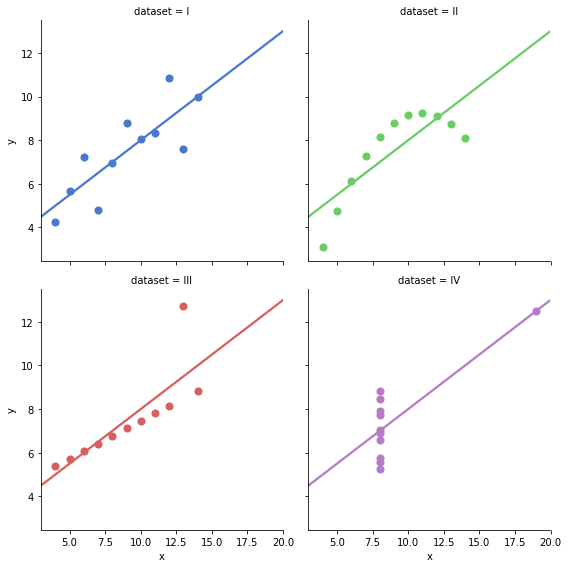

In [118]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

/Users/SJ/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/SJ/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


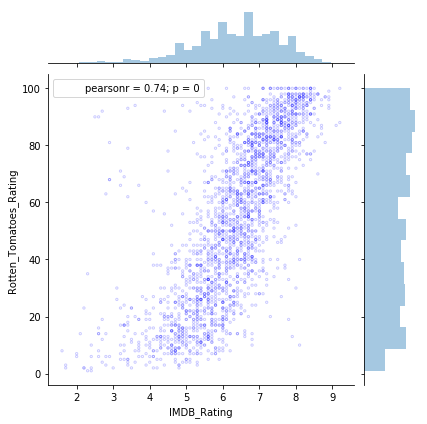

In [119]:
g = sns.jointplot(movies['IMDB_Rating'], movies['Rotten_Tomatoes_Rating'], s=5, alpha=0.2, famocecolors='none', edgecolors='b')

/Users/SJ/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/SJ/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


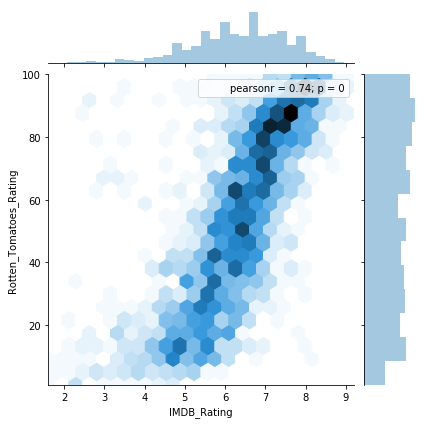

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import altair as alt
import pandas as pd
import scipy.stats as ss
import vega_datasets

movies = vega_datasets.data.movies()
%matplotlib inline
g = sns.jointplot(movies['IMDB_Rating'], movies['Rotten_Tomatoes_Rating'],kind = 'hex')

/Users/SJ/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color'
  s)


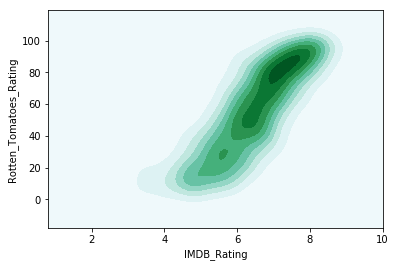

In [165]:
ax = sns.kdeplot(movies['IMDB_Rating'], movies['Rotten_Tomatoes_Rating'], shade=True, color="g")

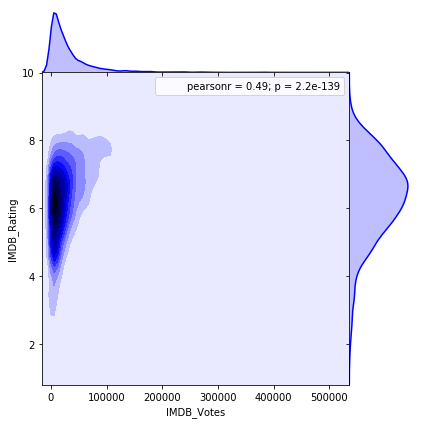

In [167]:
g = sns.jointplot(movies['IMDB_Votes'], movies['IMDB_Rating'], 
                  kind = 'kde', space = 0, color='b',)